
# Project: Investigate a Dataset - Gapminder World 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Gapminder has collected information about how people live their lives in different countries, tracked across the years.Here I will focus on the 10 years between 2003 and 2013, and on a number of selected indicators.These are the selected indicators for this project:
  <ol>
   <li>
   <b>Total population</b>
   </li>

   <li>
   <b>Total Labor force</b>
   </li>
   <li>
       <b>Total GDP (PPP dollars, inflation-adjusted)</b>: Gross Domestic Product(GDP) measures how fast the economy is growing.</li>

  <b>Note:</b>The data is adjusted for inflation and differences in the cost of living between countries, known as PPP dollars.
  </ol>

### Question(s) for Analysis
>In this project we will explore countries' population and how they make use of them as labor power. Also we will explore countries' GDP across the 10 years between 2003 and 2013 and how it changed
><ol><li>What are the top 10 countries in population and what are the best 3 countries in making good use of them in labor force</li><li>
                 Which countries has a maximum decreasing GDP from 2003 to 2013? and What is the country with the maximum increase in GDP?</li>
                <li>What is the unemployment rate of Egpyt and how does it change across the years?</li>
            </ol>


In [210]:
# import statements for data analysis project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [211]:
# Upgrade pandas and used packages to the latest verions 
#Note: It's recommeded to restart the kernel after installing these packages and you should comment these lines out after
#being installed and before restarting the kernel
!pip install --upgrade pandas==0.25.0
!pip install -U seaborn
!pip install -U matplotlip

<a id='wrangling'></a>
## Data Wrangling

<ol type="A">

<li> Reading CSV Files </li>
<li> Cleaning Data </li>
<li> Exploring with visuals </li>

</ol>

### A- Reading CSV Files

In [212]:
#Gapmider has provided csv file type for download
# Loading population Data and explore it
df_population=pd.read_csv('Gapminder/population_total.csv')
df_population.head()


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [213]:
# Loading total labor force Data and explore it
df_labor=pd.read_csv('Gapminder/Labor force, total.csv')
df_labor.columns


Index(['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [214]:
# Loading GDP  Data and explore it
df_gdp=pd.read_csv('Gapminder/total_gdp_ppp_inflation_adjusted.csv')
df_gdp.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
224,Samoa,59.6M,59.6M,59.6M,59.6M,59.6M,59.5M,59.5M,59.5M,59.5M,...,808M,846M,863M,878M,914M,867M,870M,889M,916M,915M
225,Yemen,3.33B,3.34B,3.34B,3.34B,3.34B,3.34B,3.34B,3.34B,3.34B,...,87.6B,91.3B,94.2B,97.4B,101B,105B,113B,101B,104B,109B
226,South Africa,1.41B,1.41B,1.41B,1.41B,1.41B,1.34B,1.34B,1.46B,1.29B,...,464B,490B,518B,548B,568B,561B,581B,598B,608B,614B
227,Zambia,422M,423M,424M,425M,426M,427M,428M,429M,430M,...,25.4B,26.8B,28.4B,30.2B,32B,34B,36.4B,38.8B,41.5B,44B
228,Zimbabwe,804M,804M,805M,806M,807M,808M,809M,810M,810M,...,18.8B,17.7B,17B,16.3B,13.3B,14B,15.3B,16.8B,18.5B,19.3B



### B- Data Cleaning



<ol>
<li>Drop columns byond our scope, our scope is years between 2003 and 2013 (10 years)</li>
<li>Convert string values like 3M to a numerical value like 3000000 and convert the columns type to int</li>
<li>Keep intersected countries between the three tables and delete the rest</li>
<li>Replace zeros in gdf table with interpolation values
<li>Restructure every table to be as required country year indicator1 ....</li>
<li>Merge all tables on country and year</li>
 <li> Check for duplicates </li>
    </ol>

In [215]:
# in population dataframe drop all columns before 2003 and after 2013 
# because are analysing between 2003 and 2013 only
df_population.drop(df_population.loc[:, '2014':].columns, axis = 1,inplace=True)
df_population.drop(df_population.loc[:, '1800':'2002'].columns, axis = 1,inplace=True)


In [216]:
#show changes in population dataframe
df_population.tail(10)


,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
187,Uzbekistan,25.7M,26.1M,26.4M,26.8M,27.2M,27.6M,28.1M,28.5M,29M,29.4M,29.9M
188,St. Vincent and the Grenadines,108k,109k,109k,109k,109k,108k,108k,108k,108k,108k,109k
189,Venezuela,25.6M,26M,26.4M,26.9M,27.2M,27.6M,28M,28.4M,28.9M,29.4M,29.8M
190,Vietnam,82.3M,83.1M,83.8M,84.6M,85.4M,86.2M,87.1M,88M,88.9M,89.8M,90.8M
191,Vanuatu,199k,204k,209k,214k,219k,225k,230k,236k,243k,250k,257k
192,Samoa,177k,179k,180k,181k,182k,183k,185k,186k,187k,189k,191k
193,Yemen,19M,19.5M,20.1M,20.7M,21.3M,21.9M,22.5M,23.2M,23.8M,24.5M,25.1M
194,South Africa,46.7M,47.3M,47.9M,48.5M,49.1M,49.8M,50.5M,51.2M,52M,52.8M,53.7M
195,Zambia,11.3M,11.6M,11.9M,12.2M,12.5M,12.8M,13.2M,13.6M,14M,14.5M,14.9M
196,Zimbabwe,12M,12M,12.1M,12.2M,12.3M,12.4M,12.5M,12.7M,12.9M,13.1M,13.4M


In [217]:
#check null values and info in population data frame
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
country    197 non-null object
2003       197 non-null object
2004       197 non-null object
2005       197 non-null object
2006       197 non-null object
2007       197 non-null object
2008       197 non-null object
2009       197 non-null object
2010       197 non-null object
2011       197 non-null object
2012       197 non-null object
2013       197 non-null object
dtypes: object(12)
memory usage: 18.5+ KB


In [218]:
#define a function that convert string values as 3M to 3000000 and also handle K for Kilo
#B for Bilion and TR for Trillion x for parsing nan values and will be replaced by zeros
def largevalue_convert_to_int(df):
    #loop for every year column in dataframe parameter
    for c in df.columns[1:]:
        value=df[c].str.extract(r'(\d*\.\d+|\d+)').astype(float) #this extracts int or float number from string value
        #this line creates new column with the character related to no. either k,m,b,tr and fill the cell with its value
        df["str"]=df[c].replace(['k','K','m','M','b','B','tr','TR','x'],[10**3,10**3, 10**6,10**6,10**9,10**9,10**12,10**12,0],regex=True).astype(int)
        df[c]=value
        #multiple the extracted number in value variable with the relevant value of the adjacent character
        df[c]=(df[c]*df["str"])
        #keep remove str column
    df.drop(columns="str",axis=1,inplace=True)
    #convert years columns to type int
    df.iloc[:,1:]=df.iloc[:,1:].astype(int)
    return df


In [219]:
#convert year columns to int in population data frame
df_population=largevalue_convert_to_int(df_population)
df_population.head()

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,23700000,24700000,25700000,26400000,27100000,27700000,28400000,29200000,30100000,31200000,32299999
1,Angola,18100000,18800000,19400000,20100000,20900000,21700000,22500000,23400000,24200000,25100000,26000000
2,Albania,3120000,3100000,3090000,3060000,3030000,3000000,2970000,2950000,2930000,2910000,2900000
3,Andorra,73200,76300,78900,81000,82700,83900,84500,84500,83700,82400,80800
4,United Arab Emirates,3710000,4070000,4590000,5300000,6170000,7090000,7920000,8550000,8950000,9140000,9200000


In [220]:
#Do the same for labor data frame
#Drop columns before 2003 and after 2013
df_labor.drop(df_labor.loc[:, '2014':].columns, axis = 1,inplace=True)
df_labor.drop(df_labor.loc[:, '1990':'2002'].columns, axis = 1,inplace=True)

In [221]:
#check labor data frame
df_labor.head()

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,5.89M,6.2M,6.48M,6.64M,6.77M,6.89M,7.03M,7.21M,7.52M,7.89M,8.31M
1,Angola,7.42M,7.68M,7.96M,8.24M,8.55M,8.87M,9.21M,9.56M,9.91M,10.3M,10.6M
2,Albania,1.3M,1.29M,1.27M,1.26M,1.25M,1.23M,1.23M,1.23M,1.37M,1.31M,1.23M
3,United Arab Emirates,2.25M,2.53M,2.94M,3.49M,4.19M,4.95M,5.65M,6.22M,6.47M,6.58M,6.58M
4,Argentina,17M,17.4M,17.5M,17.8M,17.9M,17.9M,18.2M,18.2M,18.6M,18.8M,18.9M


In [222]:
#check null values and info in labor data frame
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
country    187 non-null object
2003       187 non-null object
2004       187 non-null object
2005       187 non-null object
2006       187 non-null object
2007       187 non-null object
2008       187 non-null object
2009       187 non-null object
2010       187 non-null object
2011       187 non-null object
2012       187 non-null object
2013       187 non-null object
dtypes: object(12)
memory usage: 17.6+ KB


In [223]:
#convert years columns to int in labor data frame
df_labor=largevalue_convert_to_int(df_labor)
df_labor.head(10)

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,5890000,6200000,6480000,6640000,6770000,6890000,7030000,7210000,7520000,7890000,8310000
1,Angola,7420000,7680000,7960000,8240000,8550000,8870000,9210000,9560000,9910000,10300000,10600000
2,Albania,1300000,1290000,1270000,1260000,1250000,1230000,1230000,1230000,1370000,1310000,1230000
3,United Arab Emirates,2250000,2530000,2940000,3490000,4190000,4950000,5650000,6220000,6470000,6580000,6580000
4,Argentina,17000000,17400000,17500000,17800000,17900000,17900000,18200000,18200000,18600000,18800000,18900000
5,Armenia,1210000,1210000,1220000,1220000,1230000,1220000,1250000,1300000,1340000,1350000,1350000
6,Australia,10100000,10200000,10600000,10800000,11000000,11300000,11500000,11700000,11900000,12000000,12200000
7,Austria,3990000,3890000,4019999,4070000,4160000,4210000,4260000,4280000,4310000,4350000,4390000
8,Azerbaijan,4220000,4210000,4230000,4240000,4280000,4350000,4450000,4510000,4550000,4630000,4700000
9,Burundi,2920000,3030000,3140000,3250000,3370000,3500000,3620000,3750000,3860000,3970000,4090000


In [224]:
#Drop columns before 2003 in gdp data frame
df_gdp.drop(df_gdp.loc[:, '1800':'2002'].columns, axis = 1,inplace=True)

In [225]:
#check  gdp data frame
df_gdp.head(10)

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,3.8B,4.07B,4.11B,4.13B,4.23B,4.07B,3.79B,3.58B,3.9B,NaN,NaN
1,Afghanistan,27.1B,28.9B,32.4B,33.9B,38.5B,39.5B,47.5B,51.3B,54.9B,63B,65.8B
2,Angola,56.8B,63.1B,76.1B,90.2B,111B,127B,130B,134B,139B,146B,152B
3,Anguilla,192M,239M,264M,318M,360M,356M,291M,280M,291M,NaN,NaN
4,Albania,19.9B,21.1B,22.3B,23.5B,24.9B,26.7B,27.6B,28.5B,29.3B,30.1B,30.7B
5,Andorra,2.59B,2.82B,3.04B,3.19B,3.19B,3.06B,2.9B,2.81B,2.73B,NaN,NaN
6,Netherlands Antilles,4.13B,4.18B,4.22B,4.31B,4.45B,4.55B,4.53B,4.53B,4.53B,NaN,NaN
7,United Arab Emirates,185B,209B,242B,294B,342B,389B,390B,415B,445B,463B,477B
8,Argentina,392B,427B,466B,504B,546B,582B,585B,637B,692B,703B,731B
9,Armenia,13.5B,14.9B,17.1B,19.4B,22B,23.5B,20B,20.3B,21.1B,22.6B,23.4B


In [226]:
#check gdp info and null values
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
country    229 non-null object
2003       221 non-null object
2004       221 non-null object
2005       229 non-null object
2006       216 non-null object
2007       213 non-null object
2008       210 non-null object
2009       209 non-null object
2010       209 non-null object
2011       209 non-null object
2012       192 non-null object
2013       186 non-null object
dtypes: object(12)
memory usage: 21.5+ KB


In [227]:
#convert years columns to int in gdp data frame
#fill null values temparatory with 1x to be properly parsed in largevalue_convert_to_int function it will be zero
#then it will be replaced with proper value in the next step
df_gdp.fillna('1x',inplace=True)
df_gdp=largevalue_convert_to_int(df_gdp)
df_gdp.head(10)

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,3800000000,4070000000,4110000000,4130000000,4230000000,4070000000,3790000000,3580000000,3900000000,0,0
1,Afghanistan,27100000000,28900000000,32400000000,33900000000,38500000000,39500000000,47500000000,51300000000,54900000000,63000000000,65800000000
2,Angola,56800000000,63100000000,76100000000,90200000000,111000000000,127000000000,130000000000,134000000000,139000000000,146000000000,152000000000
3,Anguilla,192000000,239000000,264000000,318000000,360000000,356000000,291000000,280000000,291000000,0,0
4,Albania,19900000000,21100000000,22300000000,23500000000,24900000000,26700000000,27600000000,28500000000,29300000000,30100000000,30700000000
5,Andorra,2590000000,2820000000,3040000000,3190000000,3190000000,3060000000,2900000000,2810000000,2730000000,0,0
6,Netherlands Antilles,4130000000,4179999999,4219999999,4310000000,4450000000,4550000000,4530000000,4530000000,4530000000,0,0
7,United Arab Emirates,185000000000,209000000000,242000000000,294000000000,342000000000,389000000000,390000000000,415000000000,445000000000,463000000000,477000000000
8,Argentina,392000000000,427000000000,466000000000,504000000000,546000000000,582000000000,585000000000,637000000000,692000000000,703000000000,731000000000
9,Armenia,13500000000,14900000000,17100000000,19400000000,22000000000,23500000000,20000000000,20300000000,21100000000,22600000000,23400000000


In [228]:
#check zero values by all function
df_gdp.all()


country     True
2003       False
2004       False
2005        True
2006       False
2007       False
2008       False
2009       False
2010       False
2011       False
2012       False
2013       False
dtype: bool

#### Replace zero values in gdp with interpolation values

In [229]:
#replace zero values with forward filling function and recheck
df_gdp=df_gdp.mask(df_gdp==0).ffill(axis=1)
df_gdp.all()


country    True
2003       True
2004       True
2005       True
2006       True
2007       True
2008       True
2009       True
2010       True
2011       True
2012       True
2013       True
dtype: bool

#### keep common countries and delete the others to make tables equal

In [230]:
#from data above 
#labor data frame has the less number of countries only 187 country so we'll match these columns with the next smaller table
#which is income dataframe 195 rows use numpy intersect function
intersected=np.intersect1d(df_population.country,df_labor.country)
intersected.shape
#we have intesected series with length 180
#remove countries not in intersected in all tables
df_gdp=df_gdp.query('country in @intersected')
df_labor=df_labor.query('country in @intersected')
df_population=df_population.query('country in @intersected')

 

In [231]:
#check all tables rows number it should be equal now
df_gdp.info()
df_population.info()
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 228
Data columns (total 12 columns):
country    180 non-null object
2003       180 non-null object
2004       180 non-null object
2005       180 non-null object
2006       180 non-null object
2007       180 non-null object
2008       180 non-null object
2009       180 non-null object
2010       180 non-null object
2011       180 non-null object
2012       180 non-null object
2013       180 non-null object
dtypes: object(12)
memory usage: 18.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 196
Data columns (total 12 columns):
country    180 non-null object
2003       180 non-null int64
2004       180 non-null int64
2005       180 non-null int64
2006       180 non-null int64
2007       180 non-null int64
2008       180 non-null int64
2009       180 non-null int64
2010       180 non-null int64
2011       180 non-null int64
2012       180 non-null int64
2013       180 non-null int64
dtypes: int64(1

#### Restrucutre tables as required to be country year indicator1 ..

In [232]:
#this is a function to restrucutre table to have country year name_of_table by using melt function
#parapmeter name: is the name of the indicator name of the newly added column
#parameter df: is the dataframe to be changed
def restructure_table(name,df):
    df=df.melt(id_vars=["country"], 
        var_name="year", 
        value_name=name)
    return df

In [233]:
df_population=restructure_table('population',df_population)
df_labor=restructure_table('labor_force',df_labor)
df_gdp=restructure_table('gdp',df_gdp)

In [234]:
#view tables after restructure
df_population.head(5)

,country,year,population
0,Afghanistan,2003,23700000
1,Angola,2003,18100000
2,Albania,2003,3120000
3,United Arab Emirates,2003,3710000
4,Argentina,2003,38100000


In [235]:
df_labor.head(5)

,country,year,labor_force
0,Afghanistan,2003,5890000
1,Angola,2003,7420000
2,Albania,2003,1300000
3,United Arab Emirates,2003,2250000
4,Argentina,2003,17000000


In [236]:
df_gdp.head(5)

,country,year,gdp
0,Afghanistan,2003,2.71e+10
1,Angola,2003,5.68e+10
2,Albania,2003,1.99e+10
3,United Arab Emirates,2003,1.85e+11
4,Argentina,2003,3.92e+11


#### Merge tables on country and year

In [237]:
df_final=pd.merge(df_population,df_labor,how="outer",on=['country','year'])
df_final=pd.merge(df_final,df_gdp,how="outer",on=['country','year'])
df_final.head(10)

,country,year,population,labor_force,gdp
0,Afghanistan,2003,23700000,5890000,2.71e+10
1,Angola,2003,18100000,7420000,5.68e+10
2,Albania,2003,3120000,1300000,1.99e+10
3,United Arab Emirates,2003,3710000,2250000,1.85e+11
4,Argentina,2003,38100000,17000000,3.92e+11
5,Armenia,2003,3020000,1210000,1.35e+10
6,Australia,2003,19600000,10100000,7.4e+11
7,Austria,2003,8180000,3990000,3.12e+11
8,Azerbaijan,2003,8359999,4220000,4.85e+10
9,Burundi,2003,6910000,2920000,4.48e+09


In [238]:
#convert year column to int and gdp to int
df_final['year']=df_final['year'].astype(int)
df_final['gdp']=df_final['gdp'].astype(int)
df_final.dtypes

country        object
year            int64
population      int64
labor_force     int64
gdp             int64
dtype: object

#### Check for duplicates

In [239]:
df_final.duplicated().any()

False

### C- Exploring with visuals

In [240]:
df_final.describe()

,year,population,labor_force,gdp
count,1980.000000,1.980000e+03,1.980000e+03,1.980000e+03
mean,2008.000000,3.755278e+07,1.704213e+07,4.616795e+11
std,3.163077,1.381893e+08,6.817526e+07,1.555560e+12
min,2003.000000,9.960000e+04,3.250000e+04,3.030000e+08
25%,2005.000000,2.897500e+06,1.170000e+06,1.537500e+10
50%,2008.000000,8.730000e+06,3.535000e+06,5.265000e+10
75%,2011.000000,2.570000e+07,1.020000e+07,2.945000e+11
max,2013.000000,1.390000e+09,7.830000e+08,1.640000e+13


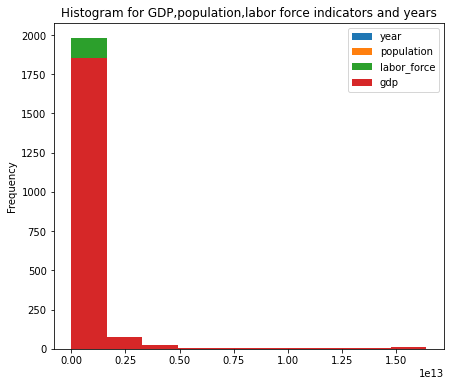

In [241]:

df_final.plot.hist(title="Histogram for GDP,population,labor force indicators and years",figsize=(7,6));


This is a histogram for all indicators which shows that the data is right skewed

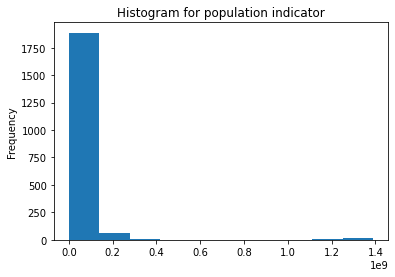

In [242]:
df_final.population.plot.hist(title="Histogram for population indicator");



This is a histogram for population indicator which shows that the data is right skewed

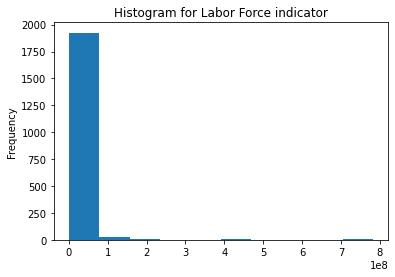

In [243]:
df_final.labor_force.plot.hist(title="Histogram for Labor Force indicator");


This is a histogram for labor force indicator which shows that the data is right skewed

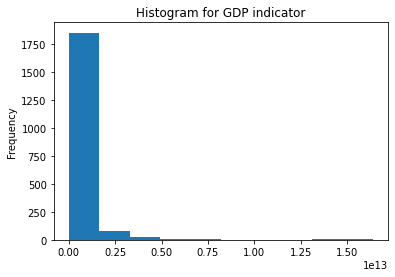

In [244]:
df_final.gdp.plot.hist(title="Histogram for GDP indicator");

This is a histogram for GDP indicator which shows that the data is right skewed

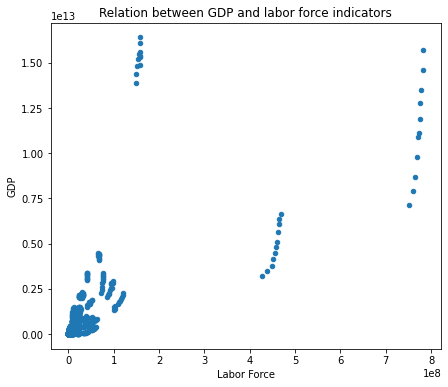

In [245]:
#explore relation between labor force and gdp
df_final.plot('labor_force','gdp',kind="scatter",title="Relation between GDP and labor force indicators",figsize=(7,6));
plt.ylabel('GDP');
plt.xlabel('Labor Force');

This is a scatter plot for  the relation between GDP and force indicators which shows that there's no correlation

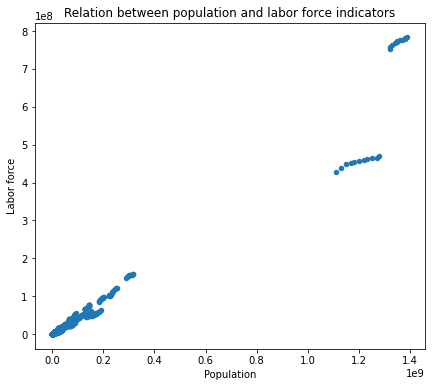

In [246]:
#explore relation between population and labor force
df_final.plot('population','labor_force',kind="scatter",title="Relation between population and labor force indicators",\
              figsize=(7,6));
plt.ylabel('Labor force');
plt.xlabel('Population');

This is a scatter plot for  the relation between population and labor force indicators which shows that there's no correlation

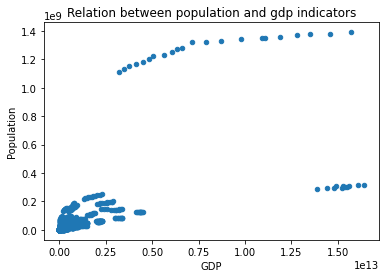

In [247]:
#explore relation between population and gdp
df_final.plot('gdp','population',kind="scatter",title="Relation between population and gdp indicators");
plt.ylabel('Population');
plt.xlabel('GDP');

This is a scatter plot for  the relation between population and gdp indicators which shows that there's no correlation

<a id='eda'></a>
## Exploratory Data Analysis

>Let's answer the proposed questions


### 1- What are the top 10 countries in population and what are the best 3 countries in making good use of them in labor force

In [248]:
#get population in the last year as it will be the maximum for all countries
df_pop_2013=df_final.query("year=='2013'")
df_pop_2013=df_pop_2013[['country','population','labor_force']]


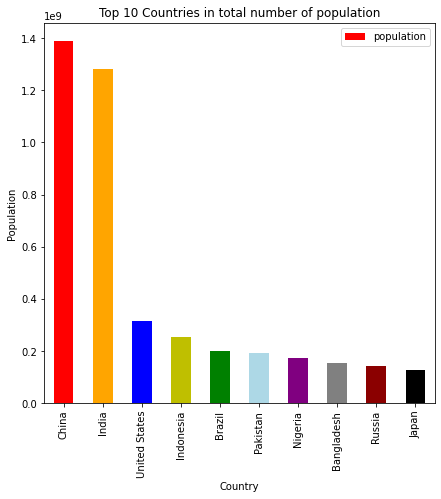

In [249]:
#get top 10 largest countries in population
df_pop_2013=df_pop_2013.nlargest(10, 'population')

#define color list to be used in plotting
colors = ['red' ,'orange', 'b','y', 'g','LightBlue','purple', 'grey', 'DarkRed', 'Black'] 
df_pop_2013.plot(y='population',x='country',kind="bar",figsize=(7, 7),\
                 title="Top 10 Countries in total number of population",color=colors);
plt.ylabel('Population');
plt.xlabel('Country');

From the graph :China is the biggest country in population then india after that comes USA

In [250]:
#get employment percentage by calculating labor force/population *100 then sort the results in descending order
df_pop_2013['employment_percent']=(df_pop_2013.labor_force/df_pop_2013.population)*100
df_pop_2013.sort_values(['employment_percent'],inplace=True, ascending=False)

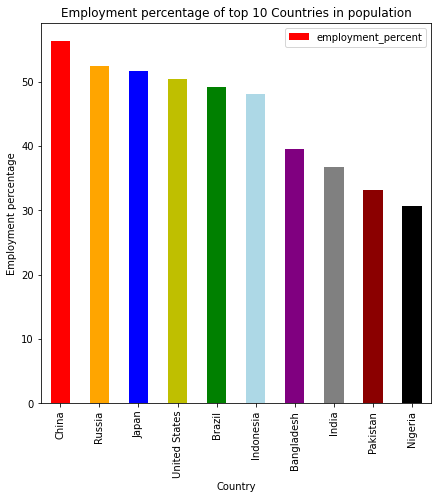

In [251]:
df_pop_2013.plot(y='employment_percent',x='country',kind="bar",figsize=(7,7),\
                 title="Employment percentage of top 10 Countries in population",color=colors);
plt.ylabel('Employment percentage');
plt.xlabel('Country');

China is the highest country in employment percentage then Russia then Japan

In [252]:
df_pop_2013.describe()


,population,labor_force,employment_percent
count,1.000000e+01,1.000000e+01,10.000000
mean,4.227000e+08,1.948900e+08,44.781708
std,4.846651e+08,2.411618e+08,8.986360
min,1.280000e+08,5.280000e+07,30.697674
25%,1.577500e+08,6.397500e+07,37.349750
50%,1.960000e+08,8.720000e+07,48.609927
75%,3.000000e+08,1.495000e+08,51.250989
max,1.390000e+09,7.830000e+08,56.330935


## 2- Which countries have a maximum decreasing GDP from 2003 to 2013? and What is the country with the maximum increase in GDP?

In [253]:
#get gdp in 2003 for all countries
df_2003=df_final.query('year=="2003"')[['country','gdp']]
df_2003.rename(columns={"gdp": "gdp_2003"},inplace=True)
df_2003.head()

,country,gdp_2003
0,Afghanistan,27100000000
1,Angola,56800000000
2,Albania,19900000000
3,United Arab Emirates,185000000000
4,Argentina,392000000000


In [254]:
#get gdp in 2013 for all countries
df_2013=df_final.query('year=="2013"')[['country','gdp']]
df_2013.rename(columns={"gdp": "gdp_2013"},inplace=True)
df_2013.head()

,country,gdp_2013
1800,Afghanistan,65800000000
1801,Angola,152000000000
1802,Albania,30700000000
1803,United Arab Emirates,477000000000
1804,Argentina,731000000000


In [255]:
#join two tables on country 
df_diff=pd.merge(df_2003,df_2013,how="outer",on=['country'])
df_diff.head()


,country,gdp_2003,gdp_2013
0,Afghanistan,27100000000,65800000000
1,Angola,56800000000,152000000000
2,Albania,19900000000,30700000000
3,United Arab Emirates,185000000000,477000000000
4,Argentina,392000000000,731000000000


In [256]:
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 3 columns):
country     180 non-null object
gdp_2003    180 non-null int64
gdp_2013    180 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.6+ KB


In [257]:
#get difference between 2 gdp columns
df_diff['gdp_diff']=(df_diff.gdp_2013-df_diff.gdp_2003)/1e6
df_diff.drop(columns={'gdp_2013','gdp_2003'},inplace=True)


In [258]:
df_diff.describe()


,gdp_diff
count,1.800000e+02
mean,1.638687e+05
std,7.169099e+05
min,-9.000000e+04
25%,4.975000e+03
50%,2.005000e+04
75%,8.125000e+04
max,8.540000e+06


In [259]:
#get id of min diff in gdp
id_min=df_diff.gdp_diff.idxmin()
id_min

79

In [260]:
#find the associated country
df_final.loc[id_min]

country                Italy
year                    2003
population          57600000
labor_force         24000000
gdp            2060000000000
Name: 79, dtype: object

In [261]:
#get full italy data from the main table
df_Italy=df_final[df_final['country']=='Italy'][['year','gdp']]
df_Italy

,year,gdp
79,2003,2060000000000
259,2004,2080000000000
439,2005,2080000000000
619,2006,2130000000000
799,2007,2170000000000
979,2008,2140000000000
1159,2009,2020000000000
1339,2010,2049999999999
1519,2011,2060000000000
1699,2012,2020000000000


In [262]:
#get id of max diff in gdp
id_max=df_diff.gdp_diff.idxmax()
id_max

30

In [263]:
#find the associated country
df_final.loc[id_max]

country                China
year                    2003
population        1320000000
labor_force        752000000
gdp            7160000000000
Name: 30, dtype: object

In [264]:
#get full china data from the main table
df_China=df_final[df_final['country']=='China'][['year','gdp']]
df_China


,year,gdp
30,2003,7160000000000
210,2004,7900000000000
390,2005,8689999999999
570,2006,9770000000000
750,2007,10900000000000
930,2008,11100000000000
1110,2009,11900000000000
1290,2010,12800000000000
1470,2011,13500000000000
1650,2012,14600000000000


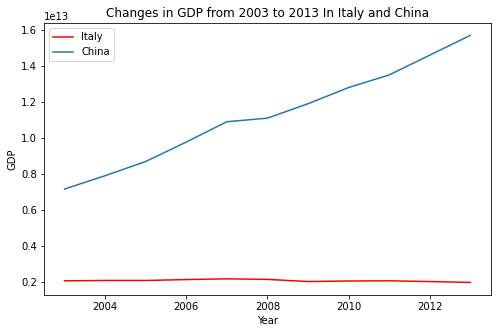

In [265]:
plt.subplots(figsize=(8, 5))
plt.plot(df_Italy.year, df_Italy.gdp,color = 'r',label="Italy")
plt.plot(df_China.year, df_China.gdp,label="China")
plt.title('Changes in GDP from 2003 to 2013 In Italy and China')
plt.xlabel('Year')
plt.ylabel('GDP');
plt.legend();

Chine has an increasing line between 2003 to 2013 in GDP but Italy has a little steady and decrease in the same period

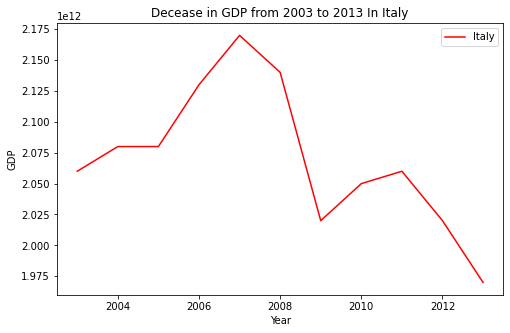

In [266]:
plt.subplots(figsize=(8, 5))
plt.plot(df_Italy.year, df_Italy.gdp,color = 'r',label="Italy")
plt.title('Decease in GDP from 2003 to 2013 In Italy')
plt.xlabel('Year')
plt.ylabel('GDP');
plt.legend();

This is another graph for Italy only to be more clear shows the amount of GDP decrease from 2003 to 2013

## 3- What is the unemployment rate of Egpyt and how does it change across the years?

In [267]:
#filter main data frame with Egypt
df_egypt= df_final.query('country=="Egypt"').copy()
#subtract labor force from population to calculate unemployed people
df_egypt["unemployed"]=df_egypt.population-df_egypt.labor_force
#get percentage of unempoloyment from all population
df_egypt["unemployent_percentage"]=df_egypt["unemployed"]/df_egypt.population*100
df_egypt

,country,year,population,labor_force,gdp,unemployed,unemployent_percentage
48,Egypt,2003,72800000,21600000,606000000000,51200000,70.329670
228,Egypt,2004,74200000,22500000,631000000000,51700000,69.676550
408,Egypt,2005,75500000,23300000,660000000000,52200000,69.139073
588,Egypt,2006,76900000,24100000,705000000000,52800000,68.660598
768,Egypt,2007,78200000,25200000,744000000000,53000000,67.774936
948,Egypt,2008,79600000,25700000,795000000000,53900000,67.713568
1128,Egypt,2009,81100000,26600000,828000000000,54500000,67.200986
1308,Egypt,2010,82800000,27400000,866000000000,55400000,66.908213
1488,Egypt,2011,84500000,27800000,877000000000,56700000,67.100592
1668,Egypt,2012,86400000,28600000,889000000000,57800000,66.898148


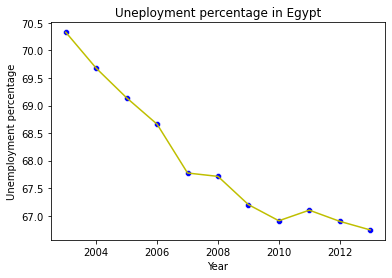

In [268]:
sns.lineplot(x='year',y='unemployent_percentage',data=df_egypt,color='y');
sns.scatterplot(x='year',y='unemployent_percentage',data=df_egypt,color='b').set_title("Uneployment percentage in Egypt");
plt.ylabel('Unemployment percentage');
plt.xlabel('Year');


Egypt has a negative correlation between years and unemployment percentage which is a good indicator 

<a id='conclusions'></a>
## Conclusions

>  Finally, from the above findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. I found out the following:.
        <ol> <li><b>Top 10 countries in population are:</b> China-India-USA-Indonesia-Brazil-Pakistan-Nigeria-Bangaladish-Russia-Japan
    and  <b>the best 3 countries in making good use of them in labor force are the top of employment percentage:</b>China-Russia-Japan</li>
    <li><b>Country that has a maximum decreasing GDP from 2003 to 2013</b> is Italy and I've researched for the reason I found out <a href="https://www.focus-economics.com/country-indicator/italy/gdp">this article</a> and <a href="https://link.springer.com/chapter/10.1007/978-3-030-54895-7_10"> that book </a> about debt increasing and fincancial crisis in Italy from 2011 which affects GDP</li>
        <b>The country with the maximum increase in GDP</b> is China
    <li><b>The unemployment rate of Egpyt </b>ranges from 70% to 66.7% from 2003 to 2013 and as found from scatter plot graph theres <u>a nagative correlation between years and unemployment rate</u> which means that it decreases from 2003 to 2013 and that's a good thing</li>
    <li>We can add another indicator for more percise data which is the number of unemployed childrens and also we can add an indicator for income to calculate how average income per person affects the labor force</li>
</ol>

### Limitations
> <ol>
        <li> All calculated statisitics are between 2003 and 2013 </li>
        <li> Not All countries in the world are included: we include only common countries between the selected indicators in the selected years</li>
            <li>Missing Data are filled from the previous year in the same country assuming that it hasn't been changed</li>
        <li> In calculating unemployment rate: children or people who can't be employed aren't taken into consideration
            </ol>




In [270]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0